### <center>Лабораторна робота №0. <br> Використання бібліотечних функцій дерева рішень</center>

**Повторіть лекційний матеріал слідуючи інструкціям**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

Спочатку налаштуємо доступ до даних на google drive (якщо ви відкриваєте блокнот в google colab, а не на PC) шляхом монтування google drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


Перевіримо шлях до папки з матеріалами лаборатоної роботи на google drive.
Якщо у вас шлях відрізняється то відредагуйте


In [3]:
!ls gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lab_5_6/data	

adult.data.csv	adult_test.csv	adult_train.csv  telecom_churn.csv


Перемістимо матеріали лабораторної роботи з google drive на віртуальну машину google colab

In [45]:
!cp -a gdrive/'My Drive'/TEACHING/IntroDataScience/intro_to_data_science/Lec_5_6/. .
!ls

data	img		      lec6_linear_models.ipynb	telecom_tree2.dot
gdrive	lec5_trees_knn.ipynb  sample_data		telecom_tree2.png


In [2]:
data = pd.read_csv('data/telecom_churn.csv')

In [3]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.drop(['State', 'Voice mail plan'], axis=1, inplace=True)

In [5]:
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

In [7]:
y = data['Churn'].astype('int')

In [8]:
X = data.drop('Churn', axis=1)

In [9]:
X.shape, y.shape

((3333, 17), (3333,))

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [12]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [13]:
first_tree = DecisionTreeClassifier(random_state=17)

In [14]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
first_knn = KNeighborsClassifier()

In [17]:
np.mean(cross_val_score(first_knn, X_train, y_train, cv=5))

0.8671274043984523

## Налаштовуємо max_depth для дерева

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
tree_params = {'max_depth': np.arange(1, 11), 'max_features':[.5, .7, 1]}

In [20]:
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [21]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 3.59 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [22]:
tree_grid.best_score_, tree_grid.best_params_

(0.9391366681677404, {'max_depth': 6, 'max_features': 0.7})

In [23]:
knn_params = {'n_neighbors': range(5, 30, 5) }#+ list(range(50, 100, 10))}

In [24]:
knn_grid = GridSearchCV(first_knn, knn_params, cv=5)

In [68]:
%%time
knn_grid.fit(X_train, y_train);

CPU times: user 945 ms, sys: 0 ns, total: 945 ms
Wall time: 957 ms


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(5, 30, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [69]:
knn_grid.best_score_, knn_grid.best_params_

(0.8701289391697531, {'n_neighbors': 10})

In [70]:
tree_valid_pred = tree_grid.predict(X_valid)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
accuracy_score(y_valid, tree_valid_pred)

0.936

In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
confusion_matrix(y_valid, tree_valid_pred)

array([[858,   9],
       [ 55,  78]])

In [75]:
np.bincount(y_valid)

array([867, 133])

In [76]:
from sklearn.tree import export_graphviz

In [77]:
second_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
second_tree.score(X_valid, y_valid)

0.905

In [78]:
export_graphviz(second_tree, out_file='telecom_tree2.dot', feature_names=X.columns, filled=True,)

In [79]:
!ls -l *.png

-rw-r--r-- 1 root root 124529 Sep 19 21:06 telecom_tree2.png


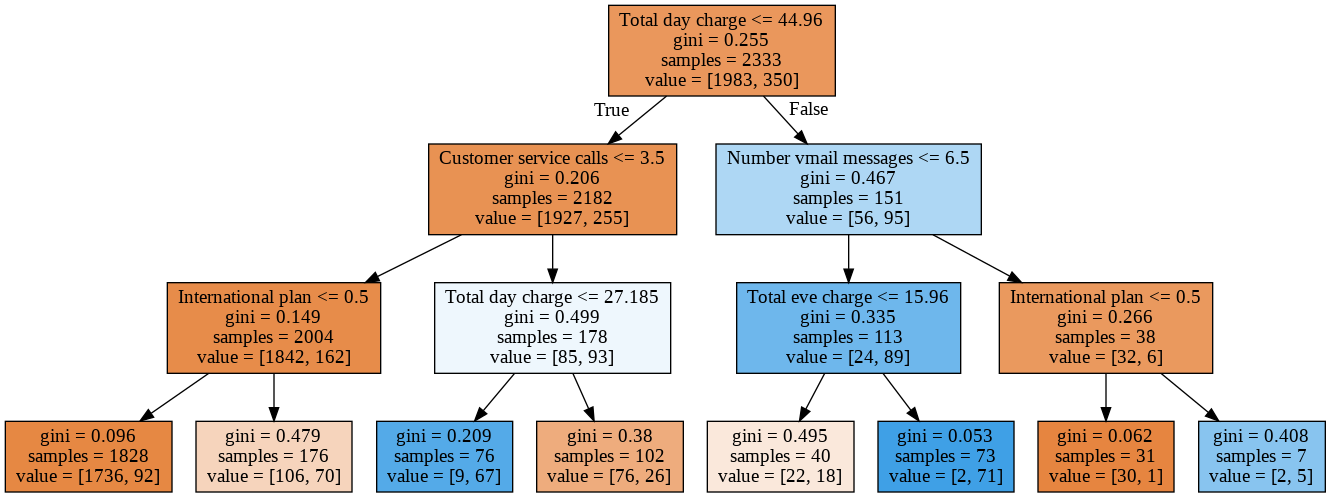

In [81]:
!dot -Tpng telecom_tree2.dot -o img/telecom_tree2.png

from IPython.display import Image
Image('img/telecom_tree2.png', width=640, height=480)

<img src='telecom_tree2.png'>